In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print("Lade MNIST Daten von Keras... (Das kann einen Moment dauern)")
import tensorflow as tf
import numpy as np

# Lade Daten aus Keras datasets
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = tf.keras.datasets.mnist.load_data()

# Kombiniere Trainings- und Testdaten, um sie wie im Original-Setup zu haben
X = np.concatenate((X_train_raw, X_test_raw), axis=0)
y = np.concatenate((y_train_raw, y_test_raw), axis=0)

# Bilder flach machen (28x28 zu 784 Features)
X = X.reshape(X.shape[0], -1)

print(f"Daten geladen: X-Shape: {X.shape}, y-Shape: {y.shape}")

Lade MNIST Daten von Keras... (Das kann einen Moment dauern)
Daten geladen: X-Shape: (70000, 784), y-Shape: (70000,)


In [ ]:
# Normalisierung: Pixelwerte von 0-255 auf 0-1 skalieren
X = X / 255.0

In [ ]:
# Split in Training und Test (60.000 Training, 10.000 Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42
)

print(f"Daten geladen: {X_train.shape[0]} Trainingsbilder, {X_test.shape[0]} Testbilder")

Daten geladen: 60000 Trainingsbilder, 10000 Testbilder


In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Architektur des Netzes
    activation='relu',             # Aktivierungsfunktion
    solver='adam',                 # Optimierer (besser als reines SGD)
    alpha=0.0001,                  # L2 Regularisierung
    batch_size=128,                # Wie viele Bilder pro Schritt
    learning_rate_init=0.001,      # Lernrate
    max_iter=20,                   # Epochen (Anzahl Durchläufe)
    verbose=True,                  # Zeige Fortschritt an
    random_state=42
)

In [ ]:
print("\nStarte Training...")
mlp.fit(X_train, y_train)
print("Training abgeschlossen!")


Starte Training...
Iteration 1, loss = 0.32728865
Iteration 2, loss = 0.12983899
Iteration 3, loss = 0.08946775
Iteration 4, loss = 0.06770426
Iteration 5, loss = 0.05462026
Iteration 6, loss = 0.04284639
Iteration 7, loss = 0.03591724
Iteration 8, loss = 0.02857147
Iteration 9, loss = 0.02386695
Iteration 10, loss = 0.01915708
Iteration 11, loss = 0.01751475
Iteration 12, loss = 0.01915657
Iteration 13, loss = 0.01237788
Iteration 14, loss = 0.01059417
Iteration 15, loss = 0.01193481
Iteration 16, loss = 0.00922316
Iteration 17, loss = 0.00787363
Iteration 18, loss = 0.01073927
Iteration 19, loss = 0.00840531
Iteration 20, loss = 0.00568652
Training abgeschlossen!


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print("\nEvaluiere auf Testdaten...")
y_pred = mlp.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nGENAUIGKEIT (Accuracy): {acc * 100:.2f}%")

print("\n--- Beispiel Vorhersagen ---")


Evaluiere auf Testdaten...

GENAUIGKEIT (Accuracy): 97.82%

--- Beispiel Vorhersagen ---


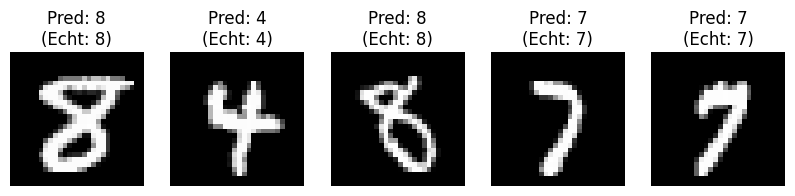

In [ ]:
# Wir zeigen die ersten 5 Testbilder und was das Netz dazu sagt
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    image = X_test[i].reshape(28, 28)
    prediction = y_pred[i]
    true_label = y_test[i]

    ax.imshow(image, cmap='gray')
    ax.set_title(f"Pred: {prediction}\n(Echt: {true_label})")
    ax.axis('off')

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.99      0.99      0.99      1152
           2       0.96      0.99      0.97       967
           3       0.98      0.97      0.97      1034
           4       0.98      0.98      0.98       906
           5       0.98      0.97      0.98       937
           6       0.97      0.99      0.98       961
           7       0.98      0.98      0.98      1055
           8       0.98      0.96      0.97       969
           9       0.97      0.97      0.97      1036

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

